In [62]:
# Some basic imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
import ast
import re

In [63]:

# Load the general data:
success_movies_path = 'data/processed_data/success_movies_df.csv'
ethnicity_path = 'data/processed_data/diversity_final.csv'

success_movies_df = pd.read_csv(success_movies_path, sep=',')
ethnicity_df = pd.read_csv(ethnicity_path, sep=',')


Goal: see the importance of mesuring uncertainty and indicating it on data visualizations.

In [64]:
success_movies_df.head(20)

,Movie_name,Movie_release_date,Ratings,Wikipedia_movie_ID,Actor_ethnicity,Movie_countries,Movie_box_office_revenue,Nomination,Success
0,$,1971,6.3,4213160.0,Hungarian Americans,{'United States of America'},NaN,False,0
1,$9.99,2008,6.7,20624798.0,Australians,"{'Australia', 'Israel'}",NaN,False,0
2,'R Xmas,2001,5.7,24799628.0,Italian Americans,"{'France', 'United States of America'}",NaN,False,0
3,'Til There Was You,1997,4.8,17841580.0,Irish Americans,{'United States of America'},NaN,False,0
4,'Til We Meet Again,1940,6.7,16038391.0,Irish Americans,{'United States of America'},NaN,False,0
5,"'night, Mother",1986,7.6,8098268.0,Czech Americans,{'United States of America'},NaN,False,1
6,(Untitled),2009,6.3,24204980.0,Jewish people,{'United States of America'},NaN,False,0
7,*batteries not included,1987,6.6,3762449.0,African Americans,{'United States of America'},NaN,False,0
8,...ing,2003,7.2,2211244.0,Koreans,{'South Korea'},NaN,False,0
9,.45,2006,5.5,4441267.0,American Jews,{'United States of America'},NaN,False,0


In [65]:
ethnicity_df.head(20)

,Wikipedia_movie_ID,ethnicity_number,actor_number,naive_diversity,normalised_entropy,diversity
0,330,1,1,1.000000,0.434294,0.434294
1,3217,1,2,0.500000,0.434294,0.217147
2,3333,0,1,0.000000,NaN,NaN
3,3746,2,4,0.500000,1.169619,0.584809
4,3837,2,9,0.222222,1.160874,0.257972
5,3947,0,3,0.000000,NaN,NaN
6,4227,1,2,0.500000,0.434294,0.217147
7,4231,2,8,0.250000,1.112808,0.278202
8,4560,1,7,0.142857,0.434294,0.062042
9,4726,2,5,0.400000,1.169619,0.467848


/var/folders/wz/ys0wggbs2nx825wkv4l_1ppw0000gn/T/ipykernel_13761/3887810224.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
/var/folders/wz/ys0wggbs2nx825wkv4l_1ppw0000gn/T/ipykernel_13761/3887810224.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


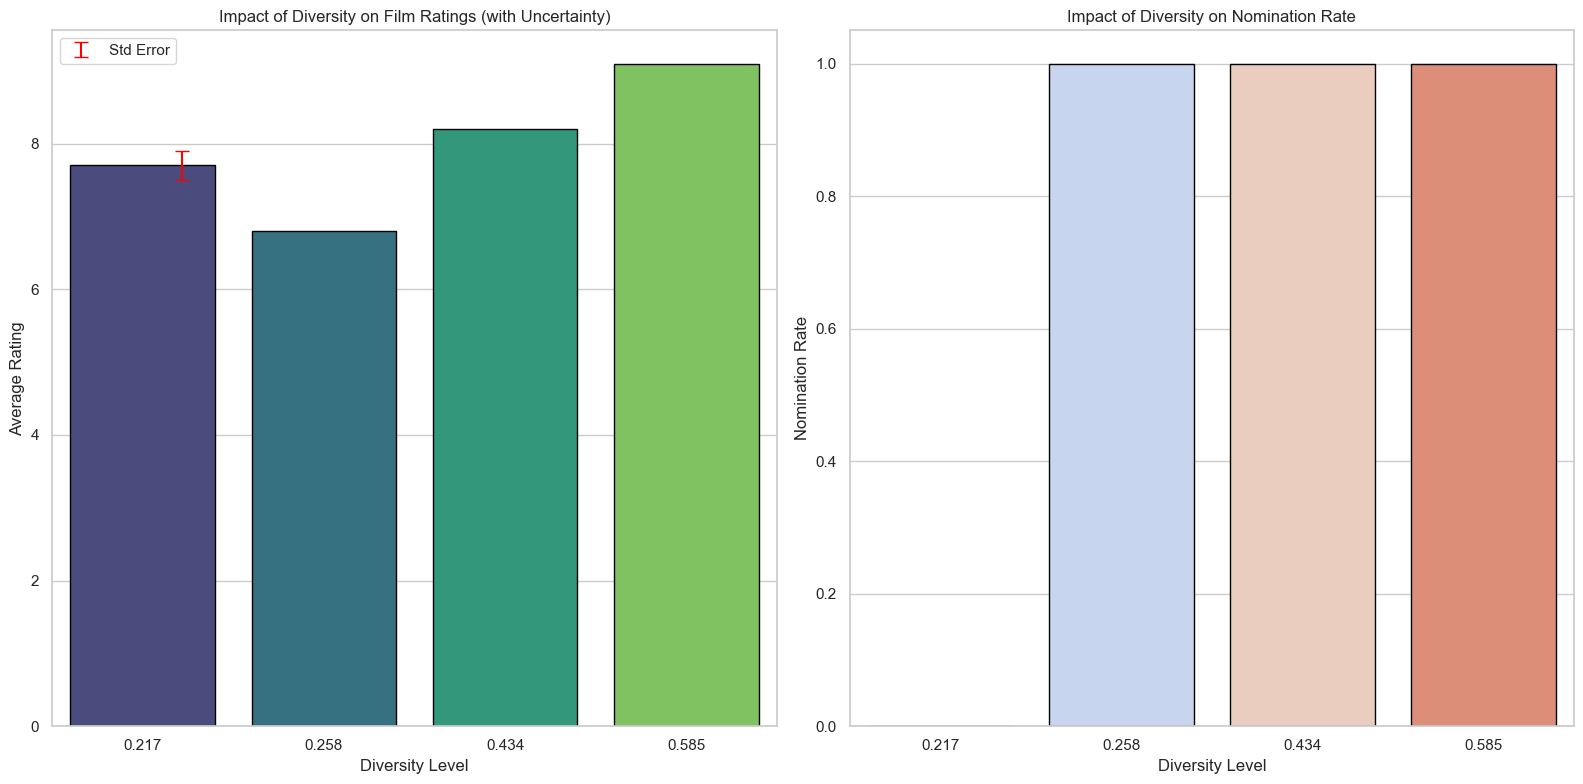

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_side_by_side_metrics_with_ethnicity(metrics_df):
    
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True)

    # Plot 1: Average Rating with uncertainties
    sns.barplot(
        x="Diversity_Level", y="Average_Rating", data=metrics_df,
        palette="viridis", edgecolor="black", ax=axes[0]
    )
    axes[0].errorbar(
        metrics_df["Diversity_Level"], metrics_df["Average_Rating"], 
        yerr=metrics_df["Rating_SE"], fmt="none", c="red", capsize=5, label="Std Error"
    )
   
    axes[0].set_xlabel("Diversity Level")
    axes[0].set_ylabel("Average Rating")
    axes[0].set_title("Impact of Diversity on Film Ratings (with Uncertainty)")
    axes[0].legend()


    # Plot 2: Nomination Rate
    sns.barplot(
        x="Diversity_Level", y="Nomination_Rate", data=metrics_df,
        palette="coolwarm", edgecolor="black", ax=axes[1]
    )
    axes[1].set_xlabel("Diversity Level")
    axes[1].set_ylabel("Nomination Rate")
    axes[1].set_title("Impact of Diversity on Nomination Rate")



    plt.tight_layout()
    plt.show()

# Main workflow
success_movies_df, ethnicity_df = load_and_prepare_data()
metrics_df = compute_metrics_with_ethnicity(success_movies_df, ethnicity_df)
plot_side_by_side_metrics_with_ethnicity(metrics_df)


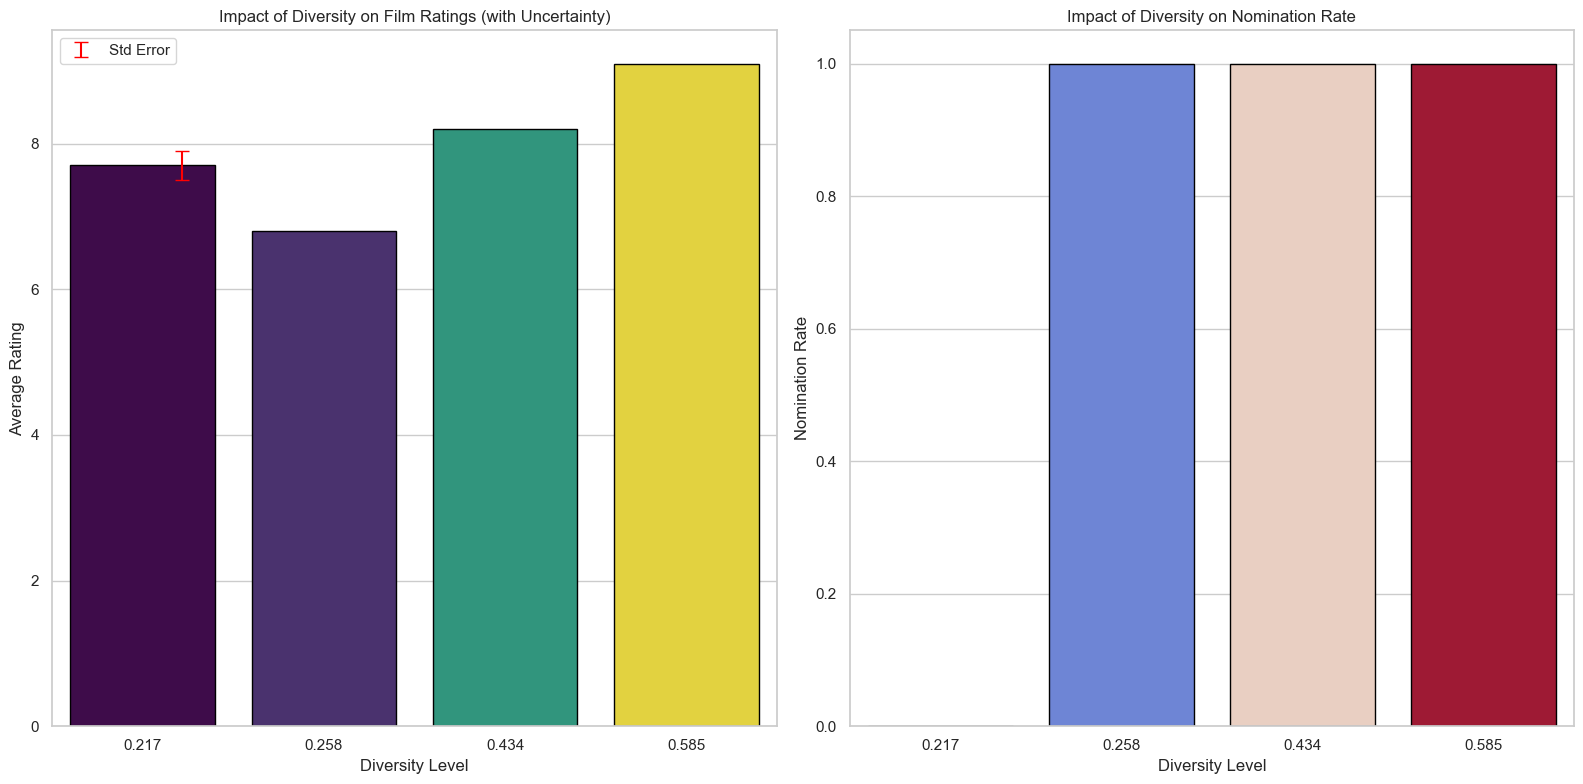

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_side_by_side_metrics_with_ethnicity(metrics_df):
    """
    Plot the metrics side by side with uncertainties and main ethnicity annotations explicitly.
    """
    sns.set(style="whitegrid")
    fig, axes = plt.subplots(1, 2, figsize=(16, 8), sharex=True)

    # Plot 1 :Average Rating with uncertainties
    sns.barplot(
        x="Diversity_Level", y="Average_Rating", data=metrics_df,
        hue="Diversity_Level", palette="viridis", edgecolor="black", ax=axes[0], legend=False
    )
    axes[0].errorbar(
        metrics_df["Diversity_Level"], metrics_df["Average_Rating"], 
        yerr=metrics_df["Rating_SE"], fmt="none", c="red", capsize=5, label="Std Error"
    )
    axes[0].set_xlabel("Diversity Level")
    axes[0].set_ylabel("Average Rating")
    axes[0].set_title("Impact of Diversity on Film Ratings (with Uncertainty)")
    axes[0].legend()

    # Plot 2: Nomination Rate
    sns.barplot(
        x="Diversity_Level", y="Nomination_Rate", data=metrics_df,
        hue="Diversity_Level", palette="coolwarm", edgecolor="black", ax=axes[1], legend=False
    )
    axes[1].set_xlabel("Diversity Level")
    axes[1].set_ylabel("Nomination Rate")
    axes[1].set_title("Impact of Diversity on Nomination Rate")

    plt.tight_layout()
    plt.show()


# Main workflow
success_movies_df, ethnicity_df = load_and_prepare_data()
metrics_df = compute_metrics_with_ethnicity(success_movies_df, ethnicity_df)
plot_side_by_side_metrics_with_ethnicity(metrics_df)
